# Solutions for DS440 HW 2

In [15]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from sklearn.datasets import load_wine
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

## Question 1:

### Part 1)

In [16]:
def q1p1():
    wine = load_wine()
    wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
    temp_sr = wine_df['alcohol']
    wine_df = wine_df.drop(columns=['alcohol'])
    wine_df['alcohol'] = temp_sr
    return(wine_df)

In [17]:
wine_df = q1p1()
display(wine_df)

malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0          1.71  2.43               15.6      127.0           2.80   
1          1.78  2.14               11.2      100.0           2.65   
2          2.36  2.67               18.6      101.0           2.80   
3          1.95  2.50               16.8      113.0           3.85   
4          2.59  2.87               21.0      118.0           2.80   
..          ...   ...                ...        ...            ...   
173        5.65  2.45               20.5       95.0           1.68   
174        3.91  2.48               23.0      102.0           1.80   
175        4.28  2.26               20.0      120.0           1.59   
176        2.59  2.37               20.0      120.0           1.65   
177        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  alcohol  
0                            3.92   1065.0    14.23  
1                            3.40   1050.0    13.20  
2                            3.17   1185.0    13.16  
3                            3.45   1480.0    14.37  
4                            2.93    735.0    13.24  
..                            ...      ...      ...  
173                          1.74    740.0    13.71  
174                          1.56    750.0    13.40  
175                          1.56    835.0    13.27  
176                          1.62    840.0    13.17  
177                          1.60    560.0    14.13  

[178 rows x 13 columns]

### Part 2)

In [18]:
def q1p2(df):
    x_df = wine_df.drop(columns=['alcohol'])
    counter = 1

    plt.figure(figsize=(21,18))

    for i in x_df:
        ax = plt.subplot(3,4,counter)
        ax.plot(x_df[i], wine_df['alcohol'], 'k.')
        plt.xlabel('{}'.format(i))
        plt.ylabel('Alcohol %')
        plt.title('Alcohol vs {}'.format(i))
        counter += 1
    plt.suptitle('Alcohol vs Features', y=0.94, fontsize=40)
    plt.subplots_adjust()
    plt.show()

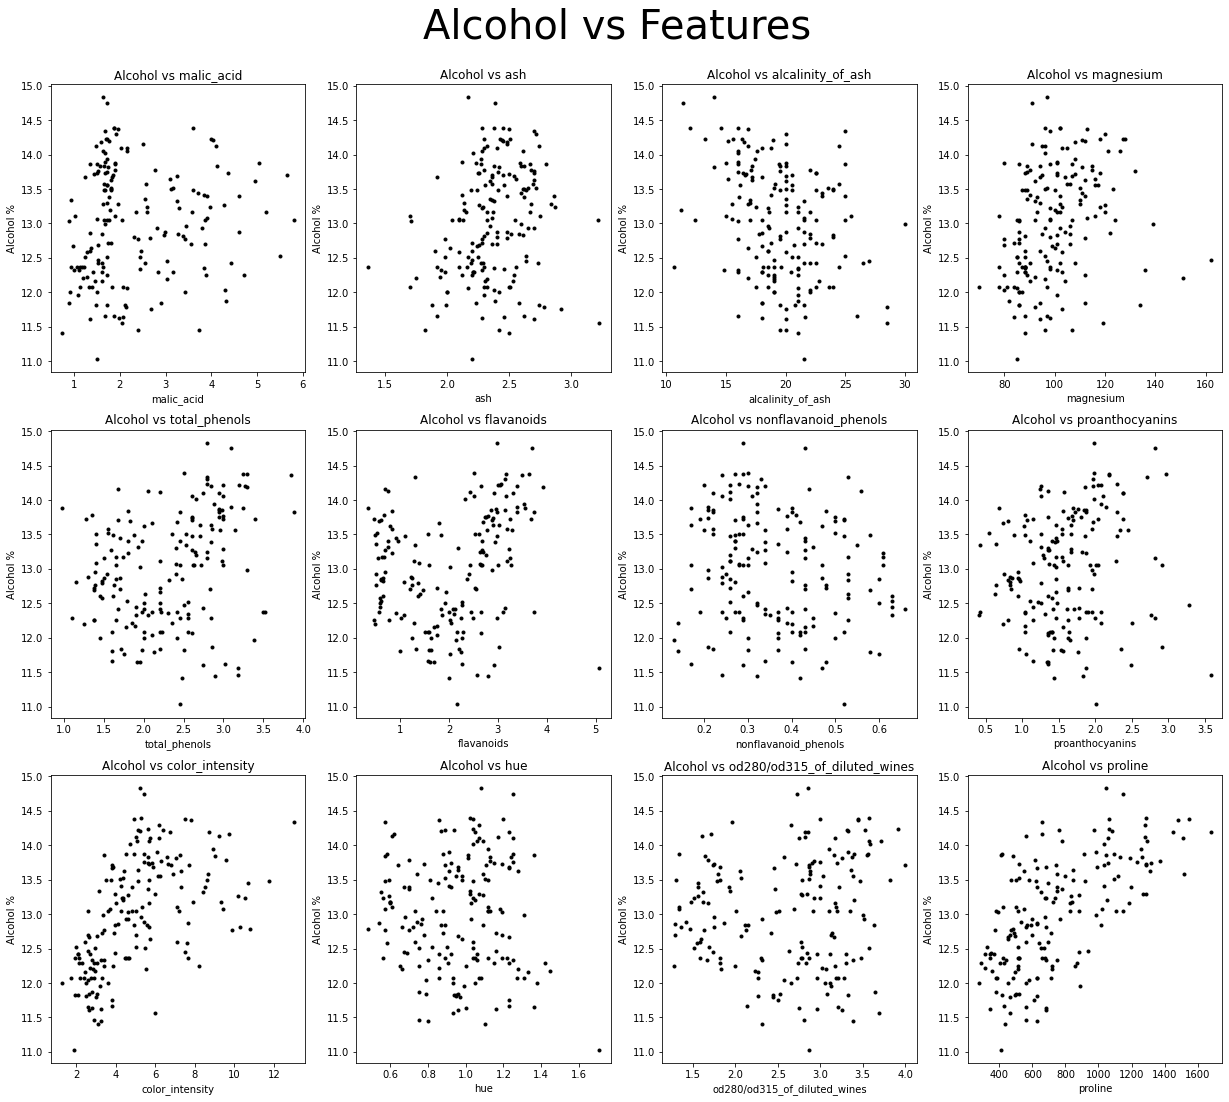

In [19]:
q1p2(wine_df)

### Part 3)

Based on the graphs above, the most helpful feature for predicting alcohol should be Proline and maybe Color Intensity. The least helpful could be any with a similar layout as Nonflavanoid Phenols, Ash, Hue, etc.

This is because proline demonstrates a visible amount of linearty while the others are just seem randomly scattered.

### Part 4)

Eyeballing it from the graphs above, we could make the assumptions:
    Increasing Color Intensity should increase the Alcohol %.
    Reducing Proline should cause the Alcohol % to drop.
    Increasing Magnesium and Reducing Ash should cause the Alcohol % to remain relatively the same since they have roughly the same correlation.

In [20]:
wine_df.corr()['alcohol']

malic_acid                      0.094397
ash                             0.211545
alcalinity_of_ash              -0.310235
magnesium                       0.270798
total_phenols                   0.289101
flavanoids                      0.236815
nonflavanoid_phenols           -0.155929
proanthocyanins                 0.136698
color_intensity                 0.546364
hue                            -0.071747
od280/od315_of_diluted_wines    0.072343
proline                         0.643720
alcohol                         1.000000
Name: alcohol, dtype: float64

The sklearn.corr() method shows how much of a correlation each feature has with a target attribute.

From the correlations above, we can infer that:
    Increasing Color Intensity should increase the Alcohol % by a little bit.
    Reducing Proline should cause the Alcohol % to drop.
    Increasing Magnesium and Reducing Ash should cause the Alcohol % to remain relatively the same since they have roughly the same correlation.

## Question 2)

In [21]:
def q2p1():
    wine = load_wine()
    wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
    
    #Build an X Matrix
    X = pd.DataFrame(np.ones(wine_df.shape[0]), columns = ['1'])
    X['X'] = np.array(wine_df['proline'].values)
    
    #Build a y Matrix
    y = pd.DataFrame(wine_df['alcohol'].values, columns = ['y'])
    
    #Build an X0 Matrix
        #Generate random values from the smallest observed X to the largest
    X0_values = np.linspace(min(X['X']), max(X['X']), X.shape[0])
    X0 = pd.DataFrame(np.ones(X.shape[0]), columns = ['1'])
    X0['X'] = np.array(X0_values)

    
    #X-Transpose times X
    XtX = (X.T.dot(X))
    #Find the inverse of X-Transpose times X
    XtX_inv = pd.DataFrame(np.linalg.inv(XtX.values), XtX.columns, XtX.index)

    #Build a Beta Matrix
    B = pd.DataFrame()
    B['B'] = (XtX_inv).dot(X.T).dot(y['y'])
    
    #Build a y0 Matrix by multiplying generated X0 Matrix by the Beta coefficients
    y0 = np.dot(X0,B)

    #Load everything into a new Matrix to sort the values
    lobf = pd.DataFrame()
    lobf['x0'] = X0['X']
    lobf['y0'] = y0
    lobf = lobf.sort_values(by=['x0'])

    #Calculate R-squared
    rss = ((np.array(y) - np.dot(X,B))**2).sum()
    tss = ((np.array(y) - np.array(y).mean())**2).sum()
    r2 = 1 - (rss/tss)
    
    #Plot Everything
    #Plots our new line of best fit for the given dimensions/degrees and calls the R-squared value in the label
    plt.figure(figsize=(12,7))
    plt.plot(lobf['x0'], lobf['y0'], lw=2, color='red', label='R-squared = {:.4f}'.format(r2))
    plt.plot(X['X'], y, 'k.')
    plt.title('Alcohol vs Proline')
    plt.ylabel('Alcohol %')
    plt.xlabel('Proline')
    plt.legend(loc='best', frameon=False)
    plt.show()

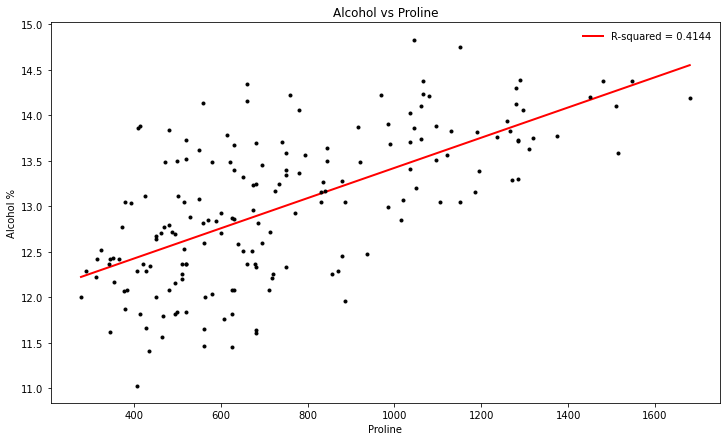

In [22]:
q2p1()

### Part 2)

In [31]:
def q2p2():
    wine = load_wine()
    wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
    
    #Build an X Matrix
    X = pd.DataFrame(np.ones(wine_df.shape[0]), columns = ['1'])
    X['X'] = np.array(wine_df['proline'].values)
    #Build a y Matrix
    y = pd.DataFrame(wine_df['alcohol'].values, columns = ['y'])
    
    #Build an X0 Matrix
        #Generate random values from the smallest observed X to the largest
    X0_values = np.linspace(min(X['X']), max(X['X']), X.shape[0])
    X0 = pd.DataFrame(np.ones(X.shape[0]), columns = ['1'])
    X0['X'] = np.array(X0_values)
    
    plt.figure(figsize=(12,7))
    
    for i in range(1,6):
        if i > 1:
            #Add to the X Matrix based on current degree
            X['X^{}'.format(i)] = X['X']**i

            #Build an X0 Matrix
                #Fit the generated values to the X0 Matrix in the same style as X
            X0['X^{}'.format(i)] = X0['X']**i
        
        #X-Transpose times X
        XtX = (X.T.dot(X))
        #Find the inverse of X-Transpose times X
        XtX_inv = pd.DataFrame(np.linalg.inv(XtX.values), XtX.columns, XtX.index)
        
        #Build a Beta Matrix
        B = pd.DataFrame()
        B['B'] = (XtX_inv).dot(X.T.dot(y['y']))
        
        #Build a y0 Matrix by multiplying generated X0 Matrix by the Beta coefficients
        y0 = np.dot(X0,B)

        #Load everything into a new Matrix to sort the values
        lobf = pd.DataFrame()
        lobf['x0'] = X0['X']
        lobf['y0'] = y0
        lobf = lobf.sort_values(by=['x0'])
        
        #Calculate R-squared
        rss = ((np.array(y) - np.dot(X,B))**2).sum()
        tss = ((np.array(y) - np.array(y).mean())**2).sum()
        r2 = 1 - (rss/tss)
        
        #Plot Everything
        #Plots our new line of best fit for the given dimensions/degrees and calls the R-squared value in the label
        plt.plot(lobf['x0'], lobf['y0'], lw=2, label='R-squared for {} degrees = {:.4f}'.format(i, r2))
    plt.plot(X['X'], y, 'k.')
    plt.title('Alcohol vs Proline')
    plt.ylabel('Alcohol %')
    plt.xlabel('Proline')
    plt.legend(loc='best', frameon=False)
    plt.show()

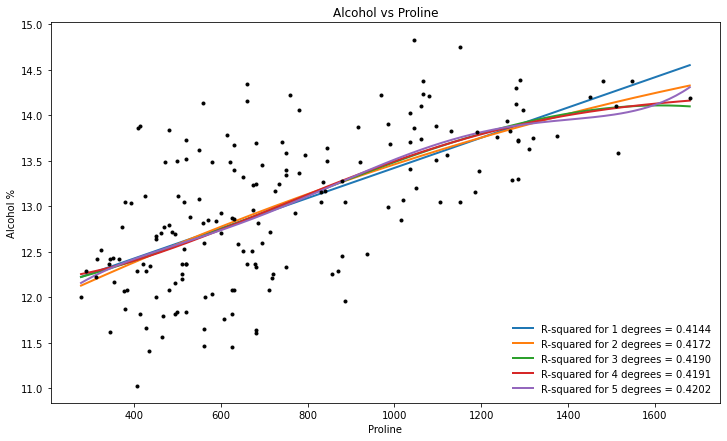

In [32]:
q2p2()

### Part 3)

Based on the R^2 values, the fifth degree line is the most accurate, due to having the highest value. Typically you cannot rely on just R^2 and must consider other factors like possible overfitting but that does not seem to be the case here as all of the lines are very similar and the R^2 barely changes as the dimensionality increases.